In [62]:
import numpy as np
import pandas as pd

In [63]:
abalone = pd.read_csv("abalone.csv")

In [64]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Ask Six Questions Before moving forward

In [65]:
abalone.shape

(4177, 9)

In [66]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [67]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [68]:
abalone.duplicated().sum()

0

In [69]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Encoding

In [70]:
abalone['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [71]:
abalone['Sex'] = abalone['Sex'].map({"M":0,"F":1,"I":2})

In [72]:
abalone['Sex'].value_counts()

0    1528
2    1342
1    1307
Name: Sex, dtype: int64

# EDA ( Exploratory data Analysis)

In [76]:
corr = abalone.corr()

<AxesSubplot:>

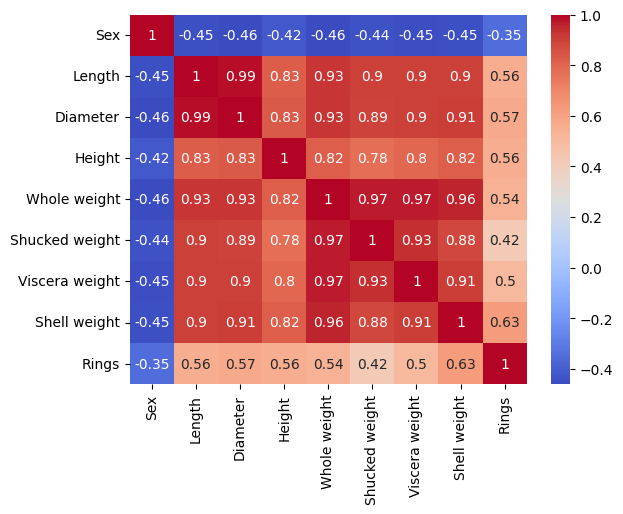

In [77]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

# Distribution of target variable (age)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

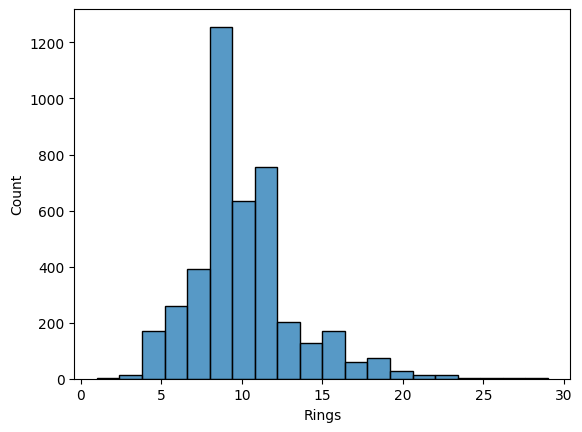

In [78]:
sns.histplot(abalone['Rings'],bins=20)

In [80]:
abalone['Rings'].value_counts()

9     689
10    634
8     567
11    487
7     391
12    267
6     258
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

# Scatter plot of length vs age

<AxesSubplot:xlabel='Length', ylabel='Rings'>

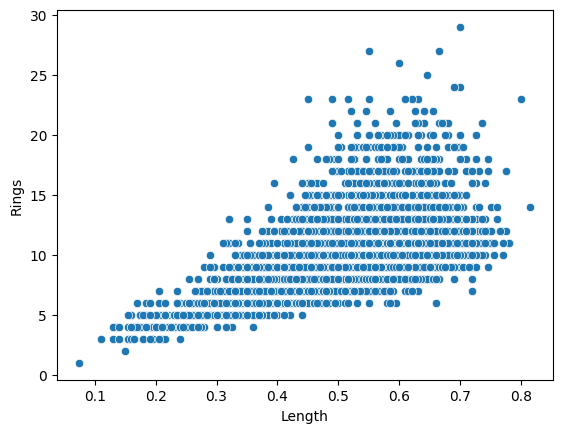

In [82]:
sns.scatterplot(x='Length',y='Rings',data=abalone)

# Train Test Split

In [83]:
X = abalone.drop('Rings',axis=1)
y = abalone['Rings']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarization the data

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [87]:
X_test_scaled

array([[-1.16554476,  0.54762541,  0.5216659 , ..., -0.14814366,
        -0.29539849,  0.69031287],
       [-1.16554476, -1.80260763, -1.65723934, ..., -1.38934271,
        -1.34175878, -1.37480684],
       [ 1.25995026, -1.29898627, -1.30253383, ..., -1.21751916,
        -1.15441916, -1.21650498],
       ...,
       [ 1.25995026, -0.92127024, -0.94782833, ..., -0.82865534,
        -0.92595622, -1.0366165 ],
       [-1.16554476,  0.84140454,  0.77502697, ...,  1.02070864,
         1.02511735,  1.69768834],
       [-1.16554476, -1.29898627, -1.2011894 , ..., -1.12934655,
        -1.24123508, -1.22370052]])

In [88]:
X_test_scaled

array([[-1.16554476,  0.54762541,  0.5216659 , ..., -0.14814366,
        -0.29539849,  0.69031287],
       [-1.16554476, -1.80260763, -1.65723934, ..., -1.38934271,
        -1.34175878, -1.37480684],
       [ 1.25995026, -1.29898627, -1.30253383, ..., -1.21751916,
        -1.15441916, -1.21650498],
       ...,
       [ 1.25995026, -0.92127024, -0.94782833, ..., -0.82865534,
        -0.92595622, -1.0366165 ],
       [-1.16554476,  0.84140454,  0.77502697, ...,  1.02070864,
         1.02511735,  1.69768834],
       [-1.16554476, -1.29898627, -1.2011894 , ..., -1.12934655,
        -1.24123508, -1.22370052]])

# Training Models

In [89]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
# Define a list of models to train and compare
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')

Linear Regression: MSE = 4.96, R2 = 0.56
Ridge Regression: MSE = 5.07, R2 = 0.56
Lasso Regression: MSE = 11.41, R2 = -0.00
Decision Tree: MSE = 9.19, R2 = 0.19
Random Forest: MSE = 4.99, R2 = 0.56


In [ ]:
# The MSE represents the average squared difference between the predicted and actual values, and a lower MSE indicates better performance.
# The R2 score represents the proportion of variance in the target variable that is predictable from the independent variables, and a higher R2 score indicates better performance.

# Chosen Model

In [95]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

9.026347305389221
0.2089537099162797


# Prediction System

In [101]:
def prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight):
    features = np.array([[Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight]])
    
    pred = dtr.predict(features).reshape(1,-1)
    
    return pred[0]


Sex = 2
Length = 8.0
Diameter = 4.0
Height = 6.0
Whole_weght = 10.0
shucked_weght = 20.0
visc_wet = 20.0
shell_weight = 15.0


prediciton = prediction_age(Sex,Length,Diameter,Height,Whole_weght,shucked_weght,visc_wet,shell_weight)

if prediciton[0] == 0:
    print("{} is a Male".format(prediciton))
elif prediciton[0] == 1:
    print("{} is a Female".format(prediciton))
else:
    print("{} is a Ifant".format(prediciton))

[14.] is a Ifant


C:\Users\Noor Saeed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [102]:
import pickle
pickle.dump(dtr,open('model.pkl','wb'))